# Homework 2: Modeling


## Task 1 - Data Cleaning

In [1]:
# import necessary library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
%matplotlib inline

In [2]:
#read data
fare = pd.read_csv("taxi_fare.csv")
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
#explore our data
fare.head()
# passenger is 0, location is 0 

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
fare.head(6)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1


In [5]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


# Delete missing values

In [6]:
fare.isna().sum()
# Now, we have no missing values

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64

In [7]:
fare[fare.dropoff_longitude.isna()]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.50,2012-12-11 12:57:00 UTC,-73.992760,40.743098,NaN,NaN,0
245696,2013-03-21 18:07:07.0000001,86.50,2013-03-21 18:07:07 UTC,-73.991572,40.740591,NaN,NaN,0
340533,2012-12-11 12:50:52.00000010,27.50,2012-12-11 12:50:52 UTC,-73.979639,40.784742,NaN,NaN,0
428108,2011-09-08 09:12:52.0000001,11.80,2011-09-08 09:12:52 UTC,-73.987041,40.751542,NaN,NaN,0
471472,2012-12-11 12:34:20.0000006,7.80,2012-12-11 12:34:20 UTC,0.000000,0.000000,NaN,NaN,0
524834,2011-09-25 23:01:12.0000005,14.76,2011-09-25 23:01:12 UTC,-73.985374,40.768518,NaN,NaN,0
574023,2013-11-04 20:59:15.0000001,10.20,2013-11-04 20:59:15 UTC,-73.998460,40.745406,NaN,NaN,0
580338,2012-12-11 12:00:53.0000002,21.00,2012-12-11 12:00:53 UTC,-73.974743,40.752057,NaN,NaN,0
794694,2013-11-04 20:07:59.0000006,7.20,2013-11-04 20:07:59 UTC,-73.977048,40.787565,NaN,NaN,0
895400,2011-06-20 11:34:44.0000001,40.00,2011-06-20 11:34:44 UTC,-73.862900,40.768900,NaN,NaN,0


In [8]:
fare[fare.dropoff_latitude.isna()]
# We can see that 14 records are missing both dropoff_latitude and dropoff_longtitude

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
120227,2012-12-11 12:57:00.00000013,12.50,2012-12-11 12:57:00 UTC,-73.992760,40.743098,NaN,NaN,0
245696,2013-03-21 18:07:07.0000001,86.50,2013-03-21 18:07:07 UTC,-73.991572,40.740591,NaN,NaN,0
340533,2012-12-11 12:50:52.00000010,27.50,2012-12-11 12:50:52 UTC,-73.979639,40.784742,NaN,NaN,0
428108,2011-09-08 09:12:52.0000001,11.80,2011-09-08 09:12:52 UTC,-73.987041,40.751542,NaN,NaN,0
471472,2012-12-11 12:34:20.0000006,7.80,2012-12-11 12:34:20 UTC,0.000000,0.000000,NaN,NaN,0
524834,2011-09-25 23:01:12.0000005,14.76,2011-09-25 23:01:12 UTC,-73.985374,40.768518,NaN,NaN,0
574023,2013-11-04 20:59:15.0000001,10.20,2013-11-04 20:59:15 UTC,-73.998460,40.745406,NaN,NaN,0
580338,2012-12-11 12:00:53.0000002,21.00,2012-12-11 12:00:53 UTC,-73.974743,40.752057,NaN,NaN,0
794694,2013-11-04 20:07:59.0000006,7.20,2013-11-04 20:07:59 UTC,-73.977048,40.787565,NaN,NaN,0
895400,2011-06-20 11:34:44.0000001,40.00,2011-06-20 11:34:44 UTC,-73.862900,40.768900,NaN,NaN,0


In [9]:
# Since we are predicting the fare of a taxi ride using pickup and drop off location information. 
# Missing values will not contribute to our prediction, so we will delete it.
fare = fare.dropna(subset=['dropoff_longitude','dropoff_latitude'], how = 'any')

In [10]:
fare.isna().sum()
# Now we have get a dataframe with no missing values

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
fare.shape
# We dropped 14 rows

(1999986, 8)

# Now we consider some values that are abnormal

In [12]:
((fare['passenger_count'] == 0) | (fare['passenger_count']> 6) ).sum()

7111

In [13]:
# Drop records that have 0 passenger_count or more than 6 passengers
fare = fare[(fare['passenger_count'] != 0) & (fare['passenger_count'] <= 6)]
((fare['passenger_count'] == 0) | (fare['passenger_count'] >6 ) ).sum()

0

In [14]:
fare[(fare['pickup_longitude'] == fare['dropoff_longitude']) & (fare['pickup_latitude'] == fare['dropoff_latitude'])].shape

(56703, 8)

#  Examine longtitude and latitude

In [15]:
# Drop records that have distance equal to 0. Since this only happens under a special and reare situation.
fare = fare[(fare['pickup_longitude'] != fare['dropoff_longitude']) | (fare['pickup_latitude'] != fare['dropoff_latitude'])]

In [16]:
fare[(fare['pickup_longitude'] == fare['dropoff_longitude']) & (fare['pickup_latitude'] == fare['dropoff_latitude'])].shape

(0, 8)

In [17]:
# # See how pickup and dropoff locations are distributed
# fig,axs = plt.subplots(1, 2, figsize=(20,8))
# axs[0].scatter(fare['pickup_longitude'], fare['pickup_latitude'], c='r',s = 1)
# axs[0].set_title('Pickup locations')
# axs[1].scatter(fare['dropoff_longitude'], fare['dropoff_latitude'], c='b', s = 1)
# axs[1].set_title('Dropoff locations')

# There are  many outliers. Use Interquantile Range Method to deal with these outliers

In [18]:
# I used some outlier detection method instead of deleting points that are outside NYC, which may happens when someone take a ride from city to some other place outside NYC

In [19]:
# pickup_longitude
temp = fare['pickup_longitude']
sorted(temp)
quantile1, quantile3= np.percentile( fare['pickup_longitude'],[25,75])
print(quantile1,quantile3)
iqr=quantile3-quantile1
# Find the IQR
print(iqr)
## Find the lower bound value and the higher bound value
lower_bound_val = quantile1 -(3 * iqr) 
upper_bound_val = quantile3 +(3 * iqr)
print(lower_bound_val,upper_bound_val)
fare = fare[(fare['pickup_longitude']<=upper_bound_val) & (fare['pickup_longitude']>=lower_bound_val)]


-73.992287 -73.96838000000002
0.023906999999979917
-74.06400799999994 -73.89665900000008


In [20]:
# pickup_lagitude
temp = fare['pickup_latitude']
sorted(temp)
quantile1, quantile3= np.percentile( fare['pickup_latitude'],[25,75])
print(quantile1,quantile3)
iqr=quantile3-quantile1
# Find the IQR
print(iqr)
## Find the lower bound value and the higher bound value
lower_bound_val = quantile1 -(3 * iqr) 
upper_bound_val = quantile3 +(3 * iqr)
print(lower_bound_val,upper_bound_val)
fare = fare[(fare['pickup_latitude']<=upper_bound_val) & (fare['pickup_latitude']>=lower_bound_val)]

40.737203 40.766578674316406
0.02937567431640531
40.649075977050785 40.85470569726562


In [21]:
# dropoff_longitude
temp = fare['dropoff_longitude']
sorted(temp)
quantile1, quantile3= np.percentile( fare['dropoff_longitude'],[25,75])
print(quantile1,quantile3)
iqr=quantile3-quantile1
# Find the IQR
print(iqr)
## Find the lower bound value and the higher bound value
lower_bound_val = quantile1 -(3 * iqr) 
upper_bound_val = quantile3 +(3 * iqr)
print(lower_bound_val,upper_bound_val)
fare = fare[(fare['dropoff_longitude']<=upper_bound_val) & (fare['dropoff_longitude']>=lower_bound_val)]

-73.991743 -73.966233
0.025509999999997035
-74.06827299999999 -73.88970300000001


In [22]:
# dropoff_latitude
temp = fare['dropoff_latitude']
sorted(temp)
quantile1, quantile3= np.percentile( fare['dropoff_latitude'],[25,75])
print(quantile1,quantile3)
iqr=quantile3-quantile1
# Find the IQR
print(iqr)
## Find the lower bound value and the higher bound value
lower_bound_val = quantile1 -(3 * iqr) 
upper_bound_val = quantile3 +(3 * iqr)
print(lower_bound_val,upper_bound_val)
fare = fare[(fare['dropoff_latitude']<=upper_bound_val) & (fare['dropoff_latitude']>=lower_bound_val)]

40.73661 40.768131
0.03152099999999791
40.642047000000005 40.86269399999999


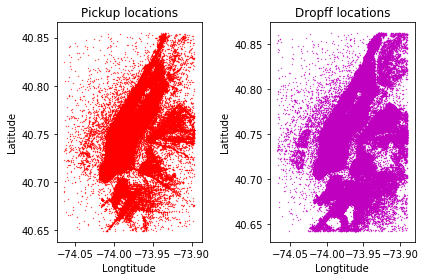

In [23]:
# Plot my pickup and dropff locations in 2 plots
# Red points are pickup locations and purple points are dropoff locations
fig, ax = plt.subplots(1,2)
ax[0].scatter(fare['pickup_longitude'], fare['pickup_latitude'], c='r',s = 0.1)
ax[1].scatter(fare['dropoff_longitude'], fare['dropoff_latitude'], c='m', s = 0.1)
ax[0].set_title('Pickup locations')
ax[0].set_xlabel("Longtitude")
ax[0].set_ylabel("Latitude")
ax[1].set_title('Dropff locations')
ax[1].set_xlabel("Longtitude")
ax[1].set_ylabel("Latitude")
plt.tight_layout()

In [24]:
# check out the type,columns,entries of data
fare.info()
# Here the datatype of pickup_datetime is wrong

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790706 entries, 1 to 1999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 123.0+ MB


# Convert the pickup_datetime datatype to timestamp

In [25]:
fare['pickup_datetime'] = pd.to_datetime(fare['pickup_datetime'], 
                                       format='%Y-%m-%d %H:%M:%S %Z',
                                     errors='raise')
fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790706 entries, 1 to 1999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 123.0+ MB


#  Examine fare_amount

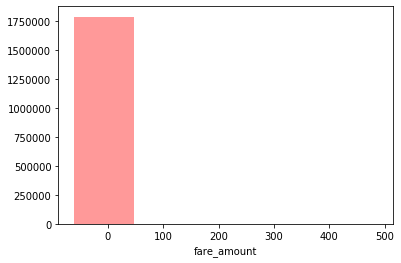

In [26]:
sns.distplot(fare['fare_amount'],bins=5
             ,kde=False,color='red')
# We can see that most of the fares are from 0 to 100, the data is right-skewed

In [27]:
# Clear negative fare amount
fare = fare[fare['fare_amount'] > 0 ]
fare[fare['fare_amount'] <= 0 ]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [28]:
fare['fare_amount']

1          16.9
2           5.7
3           7.7
4           5.3
5          12.1
           ... 
1999995     4.0
1999996     7.0
1999997    10.5
1999998    10.9
1999999    12.9
Name: fare_amount, Length: 1790624, dtype: float64

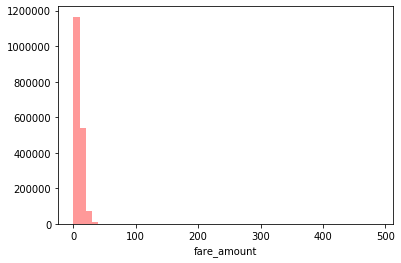

In [29]:
sns.distplot(fare['fare_amount'],bins=50,kde=False,color='red')

# Deal with out right-skewed fare amount
It can be seen that there are too much skewness in the data, our analysis may not work well if we do not handle it.
I will the log of fare_amount so that the distribution looks more normal and more easy to deal with outliers.
Normality assumption of our response variable is an important part of the linear regression.

In [30]:
# Apply log transformation to the right-skewed data will normalize the data
fare['log_fare_amount'] = [np.log(x) for x in fare['fare_amount']]

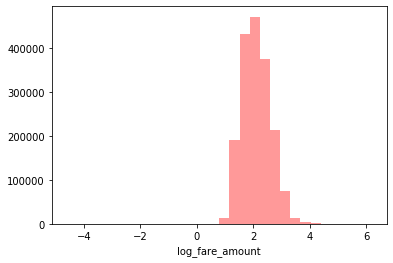

In [31]:
sns.distplot(fare['log_fare_amount'],bins=30,kde=False,color='red')

In [32]:
fare['log_fare_amount']

1          2.827314
2          1.740466
3          2.041220
4          1.667707
5          2.493205
             ...   
1999995    1.386294
1999996    1.945910
1999997    2.351375
1999998    2.388763
1999999    2.557227
Name: log_fare_amount, Length: 1790624, dtype: float64

In [33]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,log_fare_amount
count,1.790624e+06,1.790624e+06,1.790624e+06,1.790624e+06,1.790624e+06,1.790624e+06,1.790624e+06
mean,9.465687e+00,-7.398136e+01,4.075218e+01,-7.397928e+01,4.075241e+01,1.687069e+00,2.122600e+00
std,5.488743e+00,1.710798e-02,2.298978e-02,1.932822e-02,2.662725e-02,1.302809e+00,4.845431e-01
min,1.000000e-02,-7.406394e+01,4.064915e+01,-7.406807e+01,4.064205e+01,1.000000e+00,-4.605170e+00
25%,6.000000e+00,-7.399283e+01,4.073719e+01,-7.399197e+01,4.073678e+01,1.000000e+00,1.791759e+00
50%,8.100000e+00,-7.398273e+01,4.075315e+01,-7.398144e+01,4.075393e+01,1.000000e+00,2.091864e+00
75%,1.150000e+01,-7.397092e+01,4.076667e+01,-7.396823e+01,4.076807e+01,2.000000e+00,2.442347e+00
max,4.880000e+02,-7.389666e+01,4.085470e+01,-7.388971e+01,4.086269e+01,6.000000e+00,6.190315e+00


Now we also want to deal with the outliers in log_fare_amount

In [34]:
# Detecting outliers using Z score
outliers=[]
def outlier(data,column):
    sd=2
    mean = np.mean(data[column])
    std =np.std(data[column])
    for i in data.index:
        zscore= (data.loc[i,column] - mean)/std 
        if np.abs(zscore) > sd:
            outliers.append(i)
    return outliers

In [35]:
# Removing outliers
indexes = outlier(fare,'log_fare_amount')
# Drop all outliers of fare_amount
fare = fare[~fare.index.isin(indexes)]

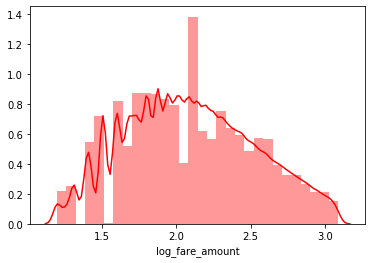

In [36]:
sns.distplot(fare['log_fare_amount'],bins=30,kde=True,color='red')
# We can see that our fare amount follows a right skewed distribution.
# In such a situation, it is not suitable to apply statistical measures 
# We still need to apply data transformation comes to our aid in such situations.

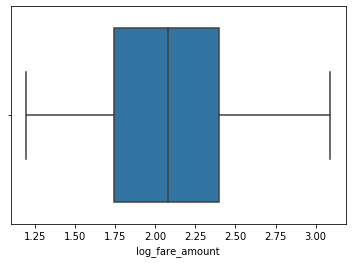

In [37]:
sns.boxplot(fare['log_fare_amount'])
# We can see that there are still many extreme values and are right-skewed

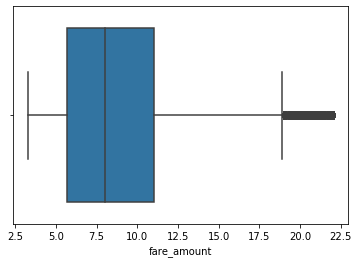

In [38]:
sns.boxplot(fare['fare_amount'])

**ANS**:

To clean the data, I did the following things:
1. I dropped the missing values in the data
2. I dropped the records that have 0 passenger_count or more than 6 passengers
3. I dropped the records that have the same pickup and dropoff locations as well as extreme locations
4. I converted the datatype of pickup_datetime from string to timestamp
5. I dropped the records that have fare_amount <= 0
6. I transformed the fare_amount data to log form
6. I detected the outliers in fare_amount using Z scores method and dropped it
<!-- 7. I also scale fare_amount using the formula: z = x-min(fare_amount) / (max(fare_amount)-min(fare_amount)) -->

## Task 2 - Train Test Split

In [39]:
#Before spill it into train and test set, I first add attribute 'distance' to our dataframe

In [40]:
# calculate the distance in each travel
x =  fare['pickup_longitude'] - fare['dropoff_longitude'] 
xsq = x**2
y = fare['pickup_latitude'] - fare['dropoff_latitude'] 
ysq = y**2
distance = np.sqrt(xsq+ysq)
fare['distance'] = distance
fare['distance']

1          0.079696
2          0.013674
3          0.025340
4          0.019470
5          0.038675
             ...   
1999995    0.003716
1999996    0.010427
1999997    0.034417
1999998    0.046952
1999999    0.057692
Name: distance, Length: 1726236, dtype: float64

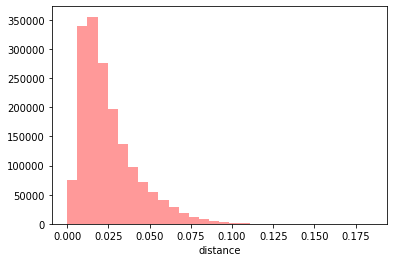

In [41]:
sns.distplot(fare['distance'],bins=30,kde=False,color='red')

In [42]:
#InterQuantile Range
temp = fare['distance']
sorted(temp)
quantile1, quantile3= np.percentile(temp,[25,75])
print(quantile1,quantile3)
## Find the IQR

iqr=quantile3-quantile1
print(iqr)
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(3 * iqr) 
upper_bound_val = quantile3 +(3 * iqr)
print(lower_bound_val,upper_bound_val)
fare = fare[(fare['distance']<=upper_bound_val) & (fare['distance']>=lower_bound_val)]

# Detecting outliers using Z score
# outliers=[]
# def outlier(data,column):
#     sd=2
#     mean = np.mean(data[column])
#     std =np.std(data[column])
#     for i in data.index:
#         zscore= (data.loc[i,column] - mean)/std 
#         if np.abs(zscore) > sd:
#             outliers.append(i)
#     return outliers
# # Removing outliers
# indexes = outlier(fare,'distance')
# # Drop all outliers of fare_amount
# fare = fare[~fare.index.isin(indexes)]

0.012569127823755483 0.03278928751133555
0.020220159687580067
-0.048091351238984725 0.09344976657407575


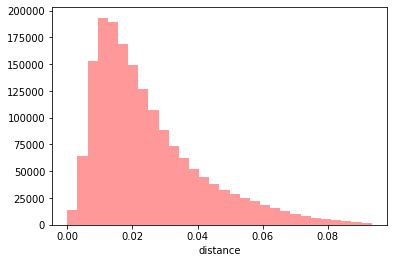

In [43]:
sns.distplot(fare['distance'],bins=30,kde=False,color='red')
# We can see that our distance also follows a right skewed distribution.

In [44]:
# Extrat the hour of day 
hour = fare['pickup_datetime'].dt.hour
fare['hour'] = hour

In [45]:
# TODO: code to split the data into training set and test set
from sklearn.model_selection import train_test_split
train,test = train_test_split(fare,train_size = 0.75,random_state = 101)

In [46]:
# See how many rows we have in train data
train.shape

(1291443, 11)

In [47]:
# Save train data to csv file
train.to_csv('taxi_fare_train.csv')

In [48]:
# See how many rows we have in test data
test.shape

(430481, 11)

**ANS**

I split my cleaned dataset into 2 parts: train and test.
Train contains 75% of the original data and test contains 25% of the original dataset

## Task 3 - Pearson Correlation

# Distance and hour of a day is calculated at the beginning of task2 . The dataframe now contains distance as one feature.

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291443 entries, 1997692 to 1423644
Data columns (total 11 columns):
key                  1291443 non-null object
fare_amount          1291443 non-null float64
pickup_datetime      1291443 non-null datetime64[ns, UTC]
pickup_longitude     1291443 non-null float64
pickup_latitude      1291443 non-null float64
dropoff_longitude    1291443 non-null float64
dropoff_latitude     1291443 non-null float64
passenger_count      1291443 non-null int64
log_fare_amount      1291443 non-null float64
distance             1291443 non-null float64
hour                 1291443 non-null int64
dtypes: datetime64[ns, UTC](1), float64(7), int64(2), object(1)
memory usage: 118.2+ MB


In [50]:
from scipy.stats import pearsonr
corr1,pvalue1= pearsonr(train['distance'] , train['fare_amount'])
print(corr1)

0.825837047635312


In [51]:
corr2,pvalue2= pearsonr(train['hour'], train['distance'])
print(corr2)

-0.03815685838404937


In [52]:
corr3,pvalue3= pearsonr(train['hour'], train['fare_amount'])
print(corr3)

-0.009064474967195113


# ANS

The highest correlation was between the distance and the taxi fare.
Hence, we will use distance as predictors to predict taxi fare in a simple linenar model

## Task 4 - Visualization

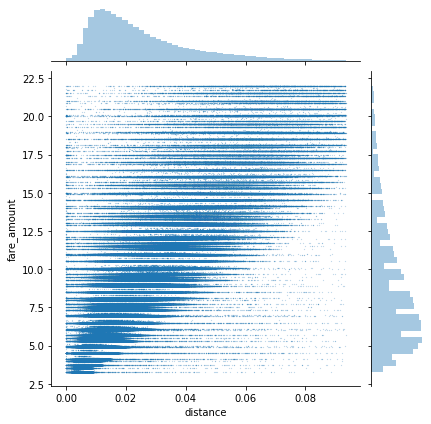

In [53]:
# TODO: code to visualize Task 3
sns.jointplot(x=train['distance'],y=train['fare_amount'],data = train,s=0.01)
# g = sns.pairplot(fare_cld, vars = ['hour','fare_amount','distance'])
# Create plots to see the relationship between variables of the 'x' and 'y' axis

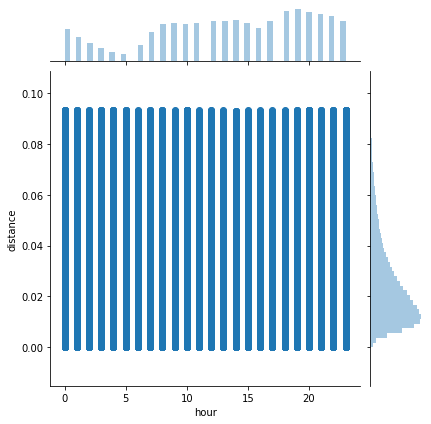

In [54]:
sns.jointplot(data= train,x='hour',y='distance')
# No linear relationship

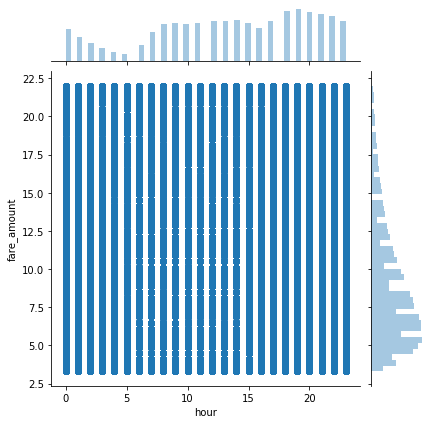

In [55]:
sns.jointplot(data= train,x='hour',y='fare_amount')
# No linear relationship

**distance v.s fare_amount**:
We can see that there is strong linear relationship between these variables.
Namely, the further the distance, the higher the fare_amount would be.

**distance v.s hour**:
We can see there is no linear relationship bwtween these two variables
Most of distance was below 1000.

**hour v.s fare_amount**:
We can see that there is no linear relationship between hour and distance.


## Part 5 - Linear Regression

In [56]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'log_fare_amount', 'distance', 'hour'],
      dtype='object')

# Model specification
In task3, we observe that only the distance is strongly correlated with fare_amount.
So I choose to use distance as my predictor variable

For outcome variable, I will use fare_amount;

In [57]:
X_train = train['distance']
y_train = train['fare_amount']
X_train

1997692    0.054614
1355136    0.038861
1114747    0.026026
1522907    0.027807
539078     0.010094
             ...   
767922     0.006564
237726     0.018481
1771372    0.010981
1467300    0.023060
1423644    0.035474
Name: distance, Length: 1291443, dtype: float64

In [58]:
# # log_fare_amount & distance
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression()
# lm.fit(X_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
# intercept, coefficients = lm.intercept_, lm.coef_
# print("intercept",intercept)
# print("coefficients",coefficients)

In [59]:
# fare_amount & distance
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train.values.reshape(-1,1),train['fare_amount'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# The coefficients 
The distance feature seems pretty important has a coefficient of nearly 199.76844064.

In [60]:
intercept, coefficients = lm.intercept_, lm.coef_
print("intercept",intercept)
print("coefficients",coefficients)

intercept [3.94995852]
coefficients [[199.76844064]]


# Now predict taxi fares in test dataset

In [61]:
X_test = test['distance']
y_test =  test['fare_amount']
max(X_test) 

0.09342412755814092

In [62]:
predictions = lm.predict(X_test.values.reshape(-1,1))

In [63]:
predictions
p = predictions.ravel()

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true = y_test, y_pred = predictions)))

MAE: 1.63049863546229
MSE: 5.106544092840312
RMSE: 2.259766380146477


Text(0, 0.5, 'fare_amount')

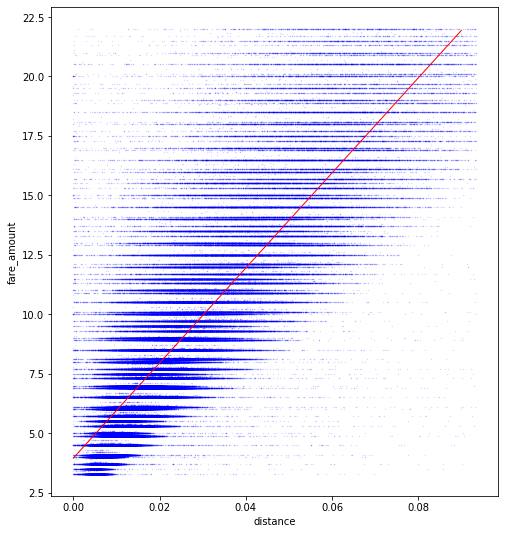

In [65]:
# Now I plots our distance against fare_amount and also adds out a red predicting line in the plot
# This plot might take some time to run
plt.figure(figsize= (8,9))
plt
plt.scatter(X_test,y_test, alpha=0.2, s=0.1, c = 'b')
x = np.linspace(0, 0.09, 100)
g = plt.plot(x, lm.intercept_ + x * lm.coef_[0], '-', c='r', lw=1)
plt.xlabel('distance')
plt.ylabel('fare_amount')
# Our predicted line predicts most of the points successfully

In [66]:
# Create a dataframe df. 
# Use this dataframe later to examine how well our data predict
p = predictions.flatten()
a = pd. DataFrame(y_test,columns= ['fare_amount'])
b = pd. DataFrame(p,columns = ['predicted_fare_amount'])
a.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)
df = pd.concat([a,b],axis =1)

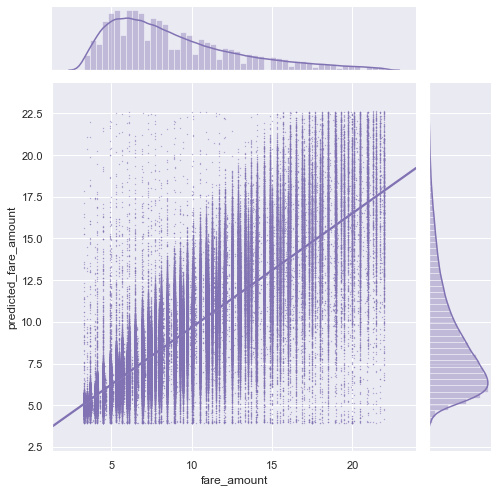

In [67]:
sns.set(style="darkgrid")
g = sns.jointplot("fare_amount", "predicted_fare_amount", data=df,
                  kind="reg", truncate=False, color="m", height=7, scatter_kws={'s':0.1})
# The regression line in the plot indicates that the log_fare_amount 
# and predicted_log_fare_amount are quite close to each other (The points fall approximately on a 45 degree straight line)

# Evaluating the predictions results and our model

Our simple linear regression model on the train set is : fare_amount = 3.94995852 + 199.76844064*distance
The model works pretty well although there are still some errors probably because of the outliers.

We can see most of our data points fall in a line with predicted values and true values
This is a good indication


## Part 6 - Another Prediction Model

In [68]:
from sklearn.neighbors import KNeighborsRegressor
train.columns
# I will still use the train and test dataset from simple linear regression as a comparison

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'log_fare_amount', 'distance', 'hour'],
      dtype='object')

In [69]:
# When using K nearest neighbourhood, the scale of variables will affect a lot in the prediction
# we will have to standardize every variable 
df = pd.DataFrame(train,columns=['fare_amount','distance','hour'])

In [70]:
# Scale variable in the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaler.fit(df.drop('fare_amount',axis=1))
scaled_features = scaler.transform(df.drop('fare_amount',axis=1))

# Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.
# df_feat = pd.DataFrame(scaled_features,columns=fare.columns[:-2])
# df_feat.head()

In [71]:
X_train2 = train['distance']
y_train2 = train['fare_amount']

In [72]:
len(X_train2)
# The n_neighbors parameter is usually the square root of number of observations
# Here we will use 1000 in our number of neighbors to consider 

1291443

In [73]:
# instantiate the model 
# This takes time
reg = KNeighborsRegressor(n_neighbors= 1000)
# fit the model using the training data
reg.fit(X_train2.values.reshape(-1,1), y_train2.values.reshape(-1,1))
y_pred2 = reg.predict(X_test.values.reshape(-1,1))

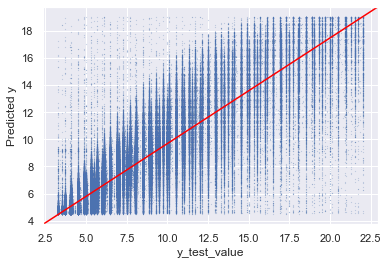

In [74]:
# Plot predicted values against test values
# Add a 45 degree red line 
fig, ax = plt.subplots()
plt.scatter(y_test, y_pred2.flatten(),s=0.01)
plt.xlabel('y_test_value')
plt.ylabel('Predicted y')
# Adding a red line which indicates: y_test_value = predicted_y
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

Text(12.085, 0.5, 'Predicted Y')

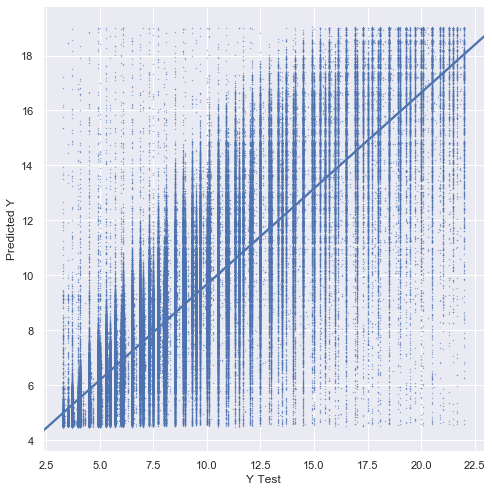

In [75]:
# Plot predicted values against test values
# uss sns's lmplot to estimate a regression line
a2 = pd. DataFrame(y_test,columns= ['fare_amount'])
b2 = pd. DataFrame(y_pred2,columns = ['predicted_value'])
a2.reset_index(drop=True, inplace=True)
b2.reset_index(drop=True, inplace=True)
df2 = pd.concat([a2,b2],axis =1)
sns.lmplot(data = df2,x = 'fare_amount', y = 'predicted_value',height=7, scatter_kws={'s':0.1} )
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [75]:
print('MAE:', metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred2))
print('MSE:', metrics.mean_squared_error(y_true = y_test, y_pred = y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true = y_test, y_pred = y_pred2)))
#COMPARE TO FIRST MODEL:
# MAE: 1.63049863546229
# MSE: 5.106544092840312 
# RMSE: 2.259766380146477
#Second:
# MAE: 1.5955803388535148
# MSE: 4.893758840353611
# RMSE: 2.212184178669039

MAE: 1.5955803388535148
MSE: 4.893758840353611
RMSE: 2.212184178669039


# Analysis of improvement
1. Our second model has a better straight line in the plot of pred_value : test_value. 
2. Mean_absolute_error,mean_squared_error,mean_squared_error all decreased compared to the simple model 
3. This approach approximates it better. The reason is that the algorithm of k-nearest neighbour is more robust to outliers